##### Name: Huiqi Wang
##### Github Username: wang2bbq
##### USC ID: 6613859213

# 1. Decision Trees as Interpretable Models

## a. Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations

In [4]:
import pandas as pd
import numpy as np
df = pd.read_csv('./Homework 5 Data/diagnosis.data', sep='\t', encoding='utf-16', header=None, names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet','Inflammation of urinary bladder','Nephritis of renal pelvis origin'])
df

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,"41,4",no,yes,yes,no,yes,no,yes
116,"41,5",no,no,no,no,no,no,no
117,"41,5",yes,yes,no,yes,no,no,yes
118,"41,5",no,yes,yes,no,yes,no,yes


## b. Build a decision tree on the whole data set and plot it

In [2]:
for c in range(1,8):
    for i in range(len(df.iloc[:,c])):
        if df.iloc[:,c][i] == 'no':
            df.iloc[:,c][i] = 0
        elif df.iloc[:,c][i] == 'yes':
            df.iloc[:,c][i] = 1
for i in range(len(df.iloc[:,0])):
    df.iloc[:,0][i] = float(df.iloc[:,0][i].replace(",","."))
df

,Temperature of patient,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,"Burning of urethra, itch, swelling of urethra outlet",Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


In [3]:
from sklearn import tree
from skmultilearn.problem_transform import LabelPowerset
clf_lp = LabelPowerset(tree.DecisionTreeClassifier(random_state=0))
X_train = df.iloc[:,0:6]
y_train = df.iloc[:,6:].to_numpy(dtype=int)

y_train = clf_lp.transform(y_train)
y_train= pd.DataFrame(y_train,columns=['class'])
# Inflammation of urinary bladder:0 and Nephritis of renal pelvis origin:0 -> 0
# Inflammation of urinary bladder:1 and Nephritis of renal pelvis origin:0 -> 1
#Inflammation of urinary bladder:0 and Nephritis of renal pelvis origin:1 -> 2
# Inflammation of urinary bladder:1 and Nephritis of renal pelvis origin:1 -> 3

[Text(0.4, 0.9, 'x[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]\nclass = 1'),
 Text(0.2, 0.7, 'x[0] <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]\nclass = 1'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]\nclass = 1'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.6, 0.7, 'x[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]\nclass = 2'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.7, 0.5, 'x[4] <= 0.5\ngini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]\nclass = 2'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 21, 0]\nclass = 2'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.452\nsamples = 29\nvalue = [0, 0, 10, 19]\nclass = 3'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0]\nclass = 2'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]\nclass = 3')]

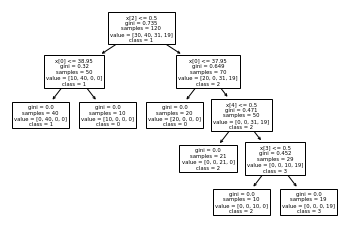

In [4]:
clf_1 = tree.DecisionTreeClassifier(random_state=0)
clf_1 = clf_1.fit(X_train, y_train)
tree.plot_tree(clf_1, class_names=[str(i)for i in clf_1.classes_])

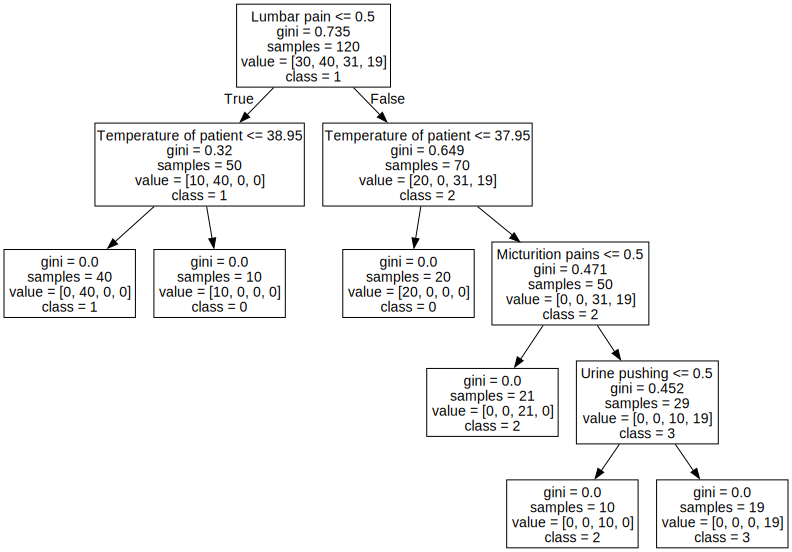

In [6]:
import graphviz 
features_names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet']

dot_data = tree.export_graphviz(clf_1, out_file=None, feature_names=features_names,class_names=[str(i)for i in clf_1.classes_]) 
graph = graphviz.Source(dot_data) 
graph 

## c. Convert the decision rules into a set of IF-THEN rules

In [7]:
def tree_to_pseudo(tree, feature_names):
    """
    Outputs a decision tree model as if/then pseudocode
    
    Parameters:
    -----------
    tree: decision tree model
        The decision tree to represent as pseudocode
    feature_names: list
        The feature names of the dataset used for building the decision tree
    """
    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
            if left[node] != -1:
                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")
                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)
                print(indent,"}")
        else:
            print(indent,"return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [8]:
features_names=['Temperature of patient','Occurrence of nausea','Lumbar pain','Urine pushing','Micturition pains','Burning of urethra, itch, swelling of urethra outlet']

tree_to_pseudo(clf_1, features_names)

 if ( Lumbar pain <= 0.5 ) {
   if ( Temperature of patient <= 38.95000076293945 ) {
     return [[ 0. 40.  0.  0.]]
   } else {
     return [[10.  0.  0.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     if ( Micturition pains <= 0.5 ) {
       return [[ 0.  0. 21.  0.]]
     } else {
       if ( Urine pushing <= 0.5 ) {
         return [[ 0.  0. 10.  0.]]
       } else {
         return [[ 0.  0.  0. 19.]]
       }
     }
   }
 }


## d. Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

clf2 = DecisionTreeClassifier(random_state=0)
path = clf2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# Get a sequence of best subtrees
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
# Cross-validation to choose alpha(alpha using above)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
clf_lists = []
scores_lists = []
for train_index, test_index in skf.split(X_train, y_train):
    clfs_cv_list = []
    clf_cv_scores = []
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    for ccp_alpha in ccp_alphas:
        clf_cv = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_cv.fit(X_train_cv, y_train_cv)
        clfs_cv_list.append(clf_cv)
    clf_cv_scores = [clf_cv.score(X_test_cv, y_test_cv) for clf_cv in clfs_cv_list]
    clf_lists.append(clfs_cv_list)
    scores_lists.append(clf_cv_scores)
avgs = []
for i in range(5):
    sum = 0
    for j in range(5):
        sum = sum + scores_lists[j][i]
    avg_cv = sum/5
    avgs.append(avg_cv)
ind_best = avgs.index(max(avgs))
alpha_best = ccp_alphas[ind_best]
subtree_best = clfs[ind_best]
print('Best alpha:',alpha_best,'\nBest subtree:',subtree_best)

Best alpha: 0.0 
Best subtree: DecisionTreeClassifier(random_state=0)


Best alpha: 0.09816666666666667 
Best subtree: DecisionTreeClassifier(ccp_alpha=0.09816666666666667, random_state=0)


[Text(0.5, 0.8333333333333334, 'x[2] <= 0.5\ngini = 0.735\nsamples = 120\nvalue = [30, 40, 31, 19]\nclass = 1'),
 Text(0.25, 0.5, 'x[0] <= 38.95\ngini = 0.32\nsamples = 50\nvalue = [10, 40, 0, 0]\nclass = 1'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0, 0]\nclass = 1'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]\nclass = 0'),
 Text(0.75, 0.5, 'x[0] <= 37.95\ngini = 0.649\nsamples = 70\nvalue = [20, 0, 31, 19]\nclass = 2'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]\nclass = 0'),
 Text(0.875, 0.16666666666666666, 'gini = 0.471\nsamples = 50\nvalue = [0, 0, 31, 19]\nclass = 2')]

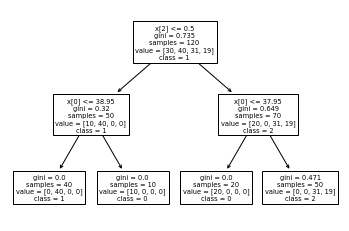

In [10]:
# Skip the overfit tree
del avgs[ind_best]
ccp_alphas_new = np.delete(ccp_alphas, ind_best)
del clfs[ind_best]

ind_best_new = avgs.index(max(avgs))
alpha_best_new = ccp_alphas_new[ind_best_new]
subtree_best_new = clfs[ind_best_new]
print('Best alpha:',alpha_best_new, '\nBest subtree:',subtree_best_new)
tree.plot_tree(subtree_best_new, class_names=[str(i)for i in subtree_best_new.classes_])

In [11]:
# Decision rules
tree_to_pseudo(subtree_best_new, features_names)

 if ( Lumbar pain <= 0.5 ) {
   if ( Temperature of patient <= 38.95000076293945 ) {
     return [[ 0. 40.  0.  0.]]
   } else {
     return [[10.  0.  0.  0.]]
   }
 } else {
   if ( Temperature of patient <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     return [[ 0.  0. 31. 19.]]
   }
 }


# 2. The LASSO and Boosting for Regression

## a. Download the Communities and Crime data from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set

In [5]:
df_communities1 = pd.read_csv('./Homework 5 Data/communities.data', sep=',', header=None)
df_communities1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12,?,?,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,...,0.01,0.28,0.05,?,?,?,?,0.00,?,0.09
1990,6,?,?,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,...,0.02,0.37,0.20,?,?,?,?,0.00,?,0.45
1991,9,9,80070,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,...,0.08,0.32,0.18,0.08,0.06,0.78,0,0.91,0.28,0.23
1992,25,17,72600,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,...,0.03,0.38,0.33,0.02,0.02,0.79,0,0.22,0.18,0.19


In [6]:
# Training set and test set
df_communities2 = df_communities1.replace(to_replace='?', value=np.nan)
train_df1 = df_communities2.iloc[:1495]
test_df1 = df_communities2.iloc[1495:]

## b. The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features

In [7]:
train_df = train_df1.iloc[:,5:]
test_df = test_df1.iloc[:,5:]
train_X = train_df.iloc[:,:122]
train_y = train_df.iloc[:,122]
test_X = test_df.iloc[:,:122]
test_y = test_df.iloc[:,122]
train_X

,5,6,7,8,9,10,11,12,13,14,...,117,118,119,120,121,122,123,124,125,126
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,NaN,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,NaN,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,NaN,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,NaN,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,0.00,0.59,0.01,0.69,1.00,0.07,0.41,0.28,0.23,0.57,...,NaN,0.02,0.14,0.22,NaN,NaN,NaN,NaN,0.00,NaN
1491,0.16,0.62,0.03,0.74,0.48,0.42,0.44,0.57,0.40,0.25,...,0.38,0.07,0.40,0.14,0.07,0.05,0.85,0.5,0.61,0.19
1492,0.01,0.36,0.95,0.24,0.03,0.01,0.44,0.42,0.27,0.63,...,NaN,0.03,0.12,0.01,NaN,NaN,NaN,NaN,0.00,NaN
1493,0.06,0.53,0.01,0.98,0.05,0.01,0.40,0.40,0.24,0.29,...,NaN,0.08,0.15,0.02,NaN,NaN,NaN,NaN,0.00,NaN


In [8]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# import from sklearn.impute
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(max_iter=100, random_state=0)
train_X_trans = imp_mean.fit_transform(train_X)
test_X_trans = imp_mean.fit_transform(test_X)

## c. Plot a correlation matrix for the features in the data set

          5         6         7         8         9         10        11   \
5    1.000000 -0.040404  0.242144 -0.306023  0.168868  0.162282  0.014554   
6   -0.040404  1.000000 -0.068374 -0.243565  0.209848  0.473320  0.517742   
7    0.242144 -0.068374  1.000000 -0.793431 -0.104912 -0.069449  0.118272   
8   -0.306023 -0.243565 -0.793431  1.000000 -0.270829 -0.436737 -0.189135   
9    0.168868  0.209848 -0.104912 -0.270829  1.000000  0.264600 -0.017945   
..        ...       ...       ...       ...       ...       ...       ...   
122  0.629584  0.002557  0.050857 -0.127985  0.144049  0.143118  0.046335   
123 -0.031956 -0.165661 -0.296503  0.273220  0.049602 -0.040305 -0.151175   
124  0.083812  0.033950  0.150648 -0.270871  0.141234  0.228749  0.146836   
125  0.464459 -0.086315  0.257781 -0.272366  0.100653  0.126210  0.012529   
126 -0.112058  0.146816 -0.168189  0.075021  0.116255  0.089098  0.011555   

          12        13        14   ...       117       118       119  \
5  

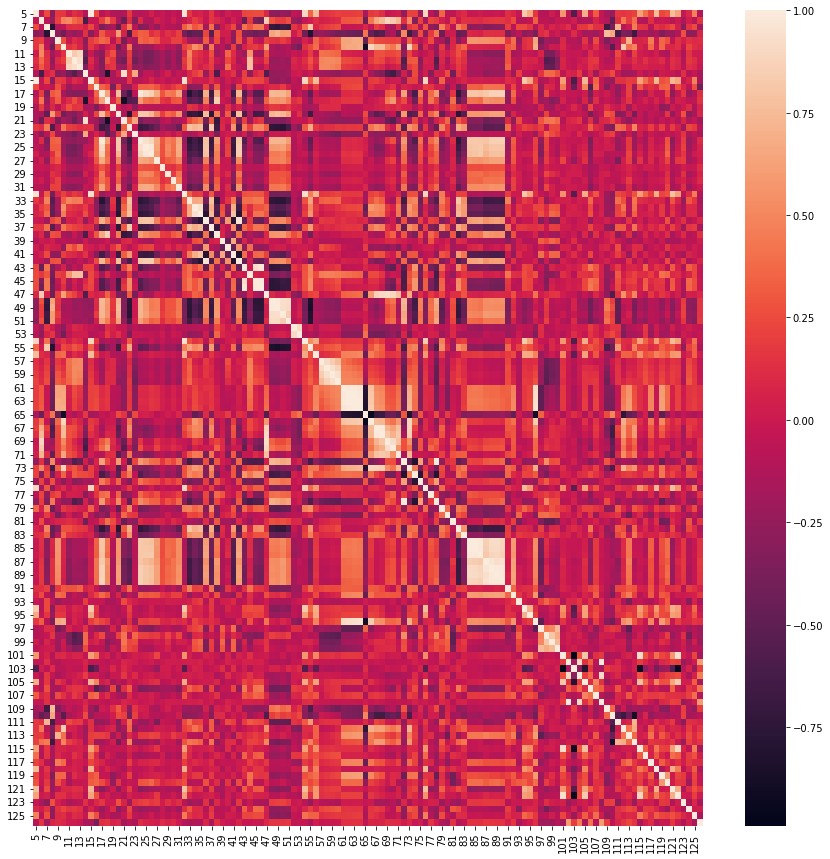

In [9]:
import seaborn as sn
import matplotlib.pyplot as plt
feaure_number = []
for i in range(5,127):
    feaure_number.append(i)
train_X_trans_df = pd.DataFrame(train_X_trans, columns=feaure_number)
test_X_trans_df = pd.DataFrame(test_X_trans, columns=feaure_number)
corr_matrix = train_X_trans_df.corr()
print(corr_matrix)
fig, ax = plt.subplots(figsize=(15,15))
sn.heatmap(corr_matrix, ax=ax)
#annot=True
plt.show()

## d. Calculate the Coefficient of Variation CV for each feature, where CV=sm, in which s is sample standard deviation and m is sample mean

In [10]:
std_df = pd.DataFrame(train_X_trans_df.std(),  columns=['std'])
mean_df = pd.DataFrame(train_X_trans_df.mean(),  columns=['mean'])
std_mean_df = pd.concat([std_df,mean_df],axis=1)
std_mean_df['CV'] = std_mean_df.apply(lambda x: x['std']/x['mean'], axis=1)
CV_df = std_mean_df
CV_df

,std,mean,CV
5,0.130359,0.058167,2.241105
6,0.164284,0.461732,0.355800
7,0.256970,0.179839,1.428885
8,0.248594,0.752829,0.330213
9,0.208910,0.153712,1.359100
...,...,...,...
122,0.084570,0.027954,3.025362
123,0.092147,0.700236,0.131595
124,0.188696,0.435299,0.433486
125,0.238201,0.093304,2.552946


## e. Pick b√128c features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

In [11]:
import math
p = math.floor(math.sqrt(128))
CV_sort_df = CV_df.sort_values(by='CV', ascending=False)
features_selected_df = CV_sort_df.iloc[:p]
features_selected_df

,std,mean,CV
101,0.102028,0.005376,18.979131
105,0.101089,0.005733,17.632910
95,0.098665,0.022983,4.292923
94,0.102736,0.029599,3.470952
54,0.113806,0.037204,3.058964
122,0.084570,0.027954,3.025362
56,0.089541,0.030595,2.926635
125,0.238201,0.093304,2.552946
32,0.133167,0.056849,2.342443
5,0.130359,0.058167,2.241105


In [12]:
selected_features = list(features_selected_df.index)
feature_names = ['LemasSwornFT','LemasTotalReq','NumStreet','NumInShelters','NumIlleg','PolicOperBudg','NumImmig','LemasPctOfficDrugUn','NumUnderPov','population','PctPolicAsian']


In [13]:
train_y_df = pd.DataFrame(train_y)
train_y_df.columns = ['ViolentCrimesPerPop']
test_y_df = pd.DataFrame(test_y)
test_y_df.index=[i for i in range(499)]
test_y_df.columns = ['ViolentCrimesPerPop']

train_X_new = train_X_trans_df.loc[:,selected_features]
train_X_new.columns = feature_names
test_X_new = test_X_trans_df.loc[:,selected_features]
test_X_new.columns = feature_names

train_new = pd.concat([train_X_new,train_y_df],axis=1)
test_new = pd.concat([test_X_new,test_y_df],axis=1)

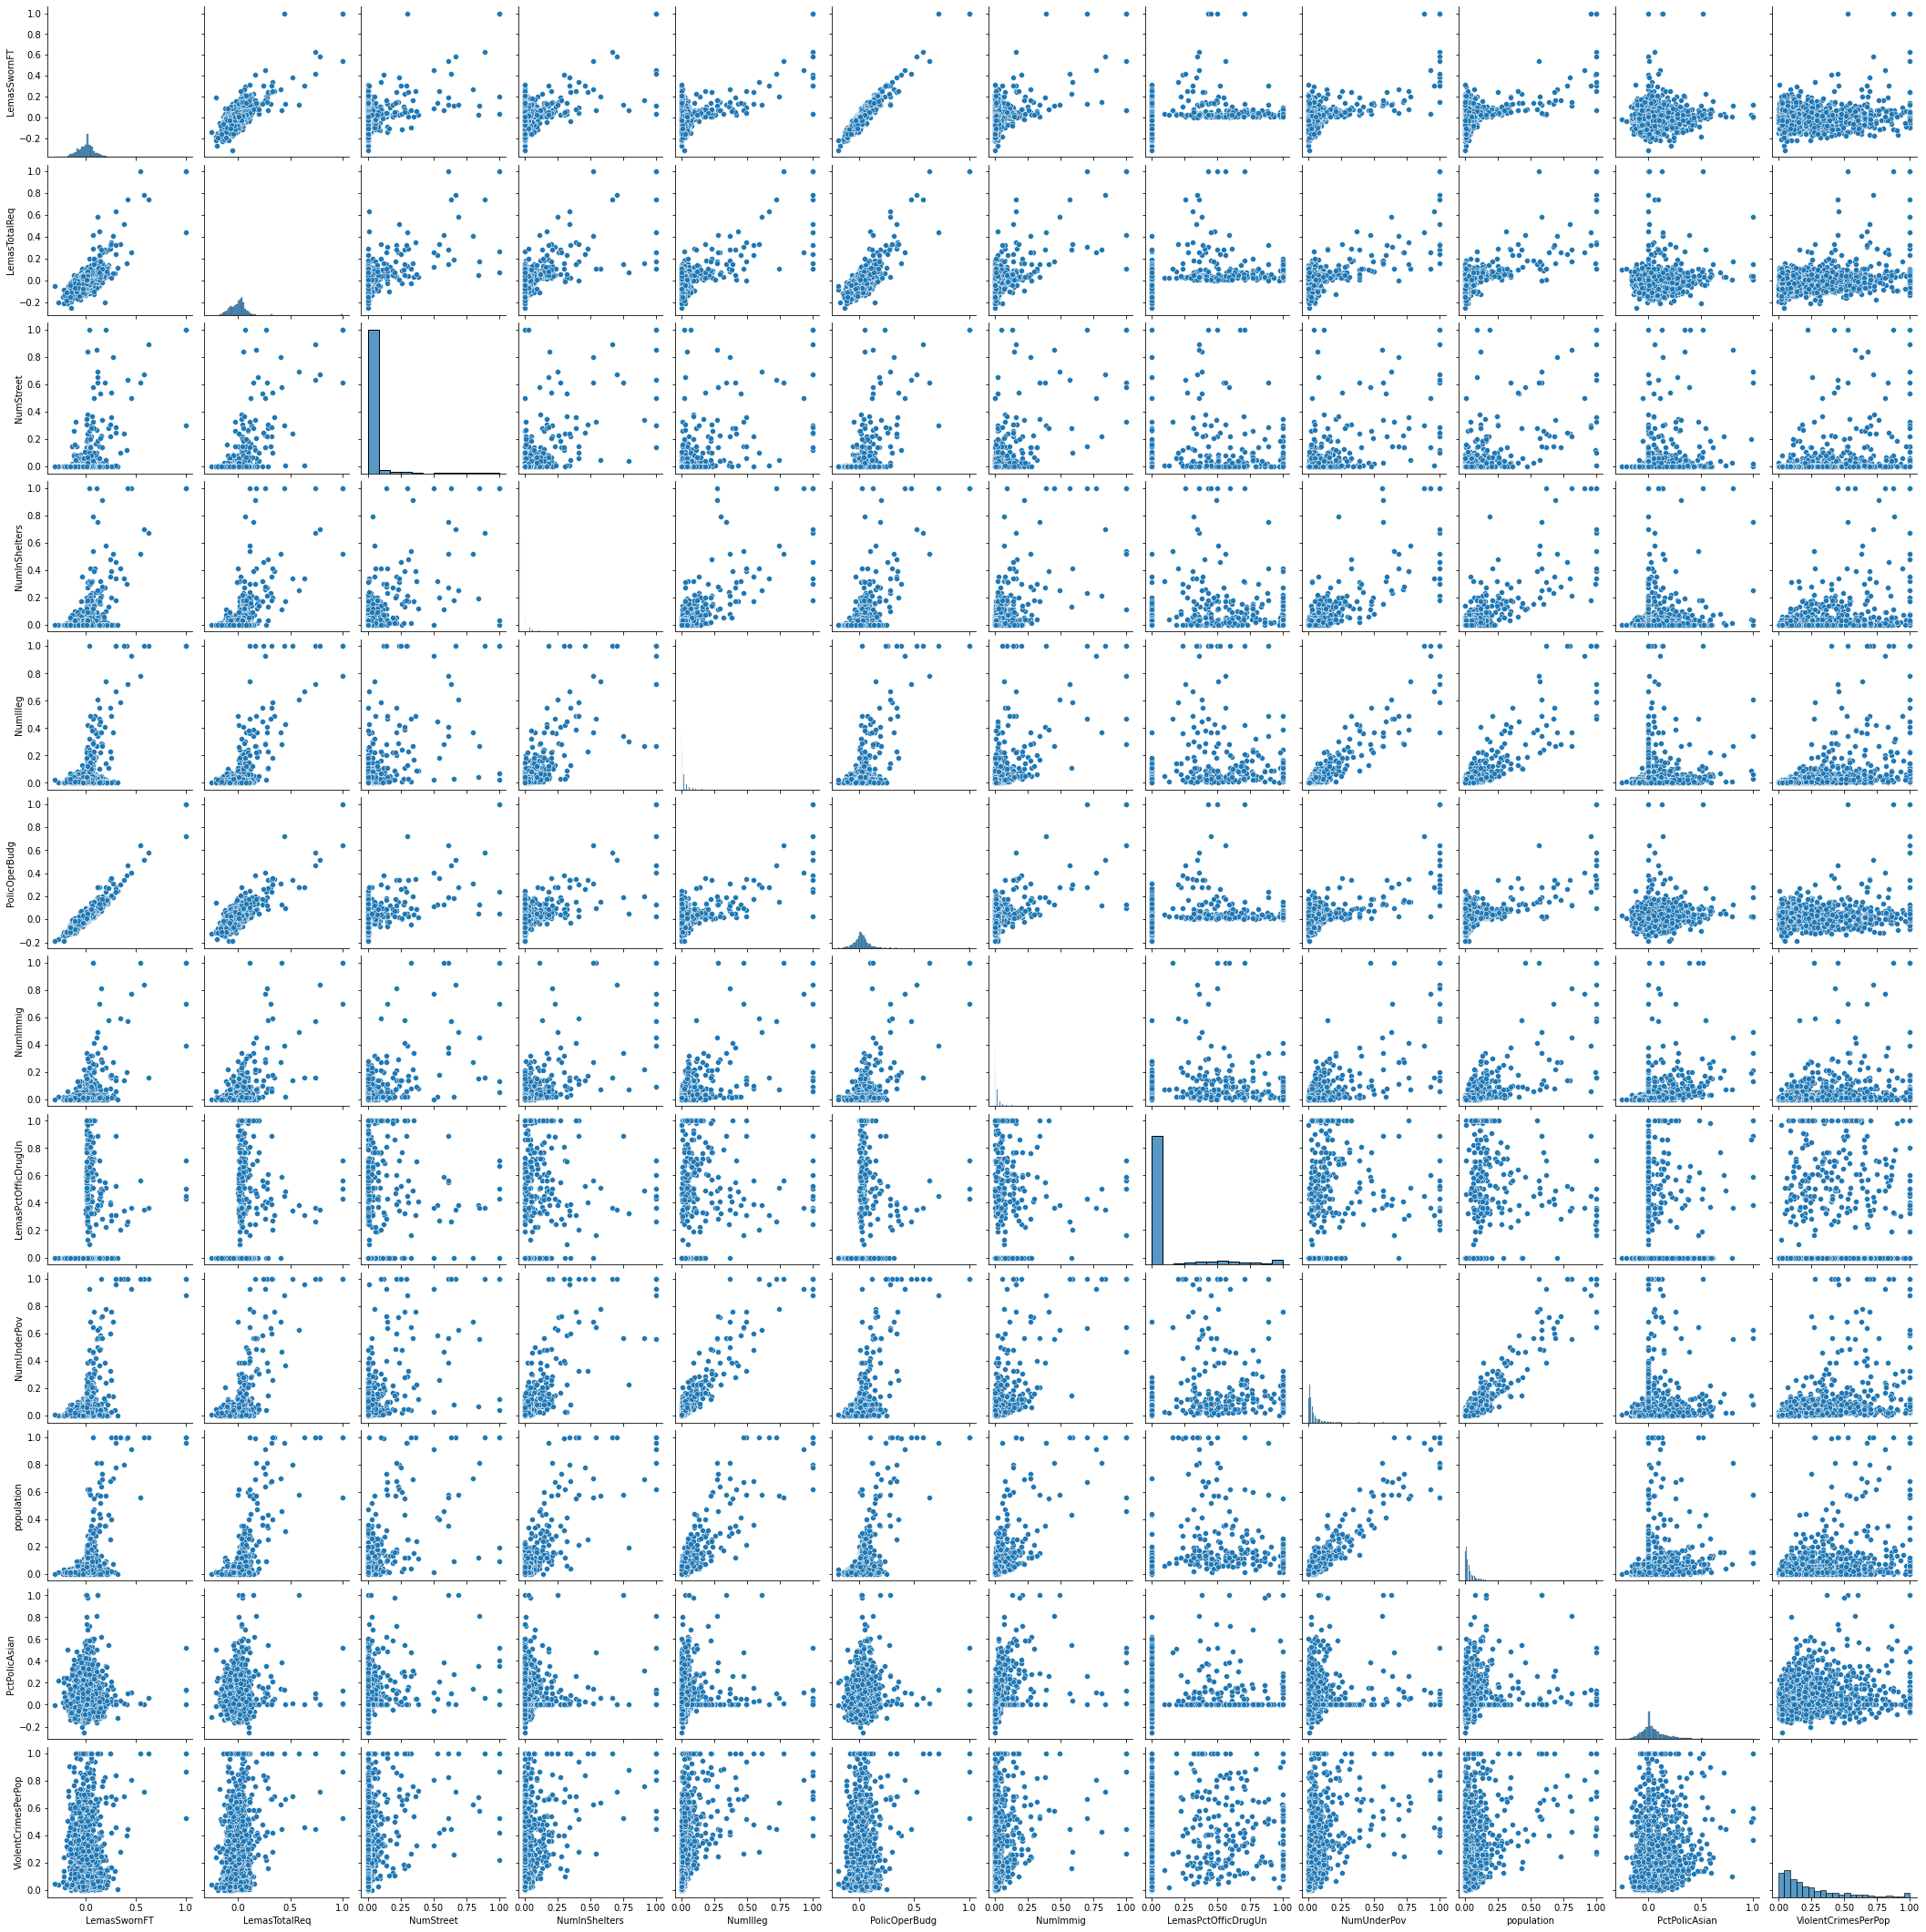

In [14]:
# scatter plots
import seaborn as sn
sn.pairplot(data=train_new, kind='scatter')

#### Findings:
#### The features 'NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'NumUnderPov' and 'population' may be significant.

<Axes: >

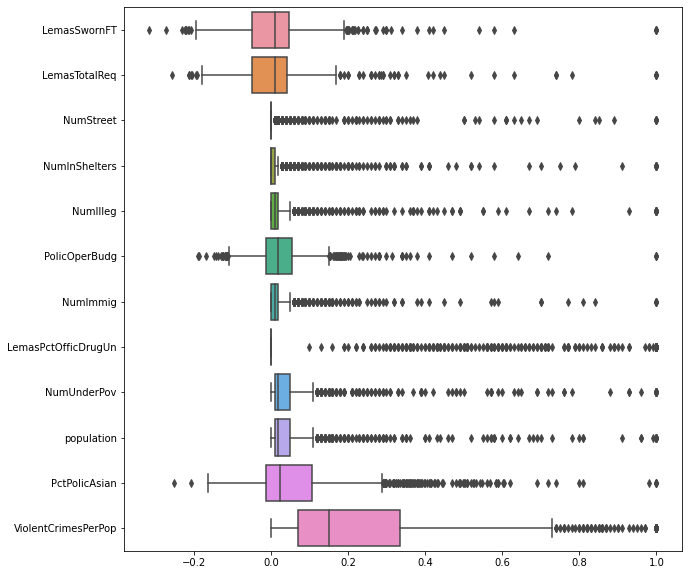

In [15]:
# box plots
fig2, ax2 = plt.subplots(figsize=(10,10))
sn.boxplot(data=train_new, orient="h", ax=ax2)

## f. Fit a linear model using least squares to the training set and report the test error

In [16]:
import statsmodels.api as sm
x_lr = train_new.iloc[:,:11] # X train
y_lr = train_new['ViolentCrimesPerPop'] # y train
X_lr = sm.add_constant(x_lr, prepend=True) # X train add constant
x_test_lr = test_new.iloc[:,:11] # X test
X_test_lr = sm.add_constant(x_test_lr, prepend=True) # X test add constant
y_test_lr = test_new['ViolentCrimesPerPop'] # y test
model_lr = sm.OLS(y_lr, X_lr)
result_lr = model_lr.fit()
print(result_lr.summary(alpha=0.05))

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.337
Model:                             OLS   Adj. R-squared:                  0.332
Method:                  Least Squares   F-statistic:                     68.65
Date:                 Thu, 13 Jul 2023   Prob (F-statistic):          3.45e-124
Time:                         01:42:09   Log-Likelihood:                 334.80
No. Observations:                 1495   AIC:                            -645.6
Df Residuals:                     1483   BIC:                            -581.9
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

In [17]:
from statsmodels.tools.eval_measures import mse
test_mse_lr = mse(y_test_lr.values, result_lr.predict(X_test_lr).values, axis=0)
print('test MSE for OLS linear model:', test_mse_lr)

test MSE for OLS linear model: 0.03251025463422654


## g. Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained

In [18]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
X_ridge = train_new.iloc[:,:11] # X train
y_ridge = train_new['ViolentCrimesPerPop'] # y train
X_test_ridge = test_new.iloc[:,:11] # X test
y_test_ridge = test_new['ViolentCrimesPerPop'] # y test
model_ridgecv = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_ridge, y_ridge)
# Re-fit
model_ridge = Ridge(alpha=model_ridgecv.alpha_).fit(X_ridge, y_ridge)
test_mse_ridge = mse(y_test_ridge, model_ridge.predict(X_test_ridge), axis=0)
print('Best alpha:',model_ridgecv.alpha_)
print('Test MSE for ridge regression model:', test_mse_ridge)

Best alpha: 0.1
Test MSE for ridge regression model: 0.0323512789433425


## h. Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized features. Report the test error for both cases and compare them

In [19]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
X_lasso = train_new.iloc[:,:11] # X train
y_lasso = train_new['ViolentCrimesPerPop'] # y train
X_test_lasso = test_new.iloc[:,:11] # X test
y_test_lasso = test_new['ViolentCrimesPerPop'] # y test
model_lassocv = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_lasso, y_lasso)
# Re-fit
model_lassso = Lasso(alpha=model_lassocv.alpha_).fit(X_lasso, y_lasso)
test_mse_lasso = mse(y_test_lasso, model_lassso.predict(X_test_lasso), axis=0)
print('Best alpha:',model_lassocv.alpha_)
print('Test MSE for LASSO model:', test_mse_lasso)
variables_selected = []
for i in range(len(model_lassso.coef_)):
    if model_lassso.coef_[i] != 0:
        variables_selected.append(model_lassso.feature_names_in_[i])
print('Variables selected:', variables_selected)

Best alpha: 0.0001
Test MSE for LASSO model: 0.03221745299840988
Variables selected: ['LemasSwornFT', 'LemasTotalReq', 'NumStreet', 'NumInShelters', 'NumIlleg', 'PolicOperBudg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'PctPolicAsian']


In [20]:
# with standardized features
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
X_lasso_standr = scaler1.fit_transform(X_lasso)
X_lasso_standr = pd.DataFrame(X_lasso_standr, columns=feature_names) # X train
scaler2 = StandardScaler()
X_test_lasso_standr = scaler2.fit_transform(X_test_lasso)
X_test_lasso_standr = pd.DataFrame(X_test_lasso_standr, columns=feature_names) # X test
model_lassocv_standr = LassoCV(alphas=np.logspace(-6, 6, 13), cv=5).fit(X_lasso_standr, y_lasso)
# Re-fit
model_lassso_standr = Lasso(alpha=model_lassocv_standr.alpha_).fit(X_lasso_standr, y_lasso)
test_mse_lasso_standr = mse(y_test_lasso, model_lassso_standr.predict(X_test_lasso_standr), axis=0)
print('Best alpha:',model_lassocv_standr.alpha_)
print('Test MSE for LASSO model with standardized features:', test_mse_lasso_standr)
variables_selected_standr = []
for i in range(len(model_lassso_standr.coef_)):
    if model_lassso_standr.coef_[i] != 0:
        variables_selected_standr.append(model_lassso_standr.feature_names_in_[i])
print('Variables selected after standardizing features:', variables_selected_standr)

Best alpha: 0.001
Test MSE for LASSO model with standardized features: 0.03155028277824541
Variables selected after standardizing features: ['LemasSwornFT', 'LemasTotalReq', 'NumStreet', 'NumInShelters', 'NumIlleg', 'PolicOperBudg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'PctPolicAsian']


In [21]:
# Compare the results
dic_compare = {}
dic_compare['test MSE']=[test_mse_lasso, test_mse_lasso_standr]
df_compare = pd.DataFrame(dic_compare)
df_compare.index = ['LASSO','LASSO with standardized features']
df_compare

,test MSE
LASSO,0.032217
LASSO with standardized features,0.031550


The LASSO model performs a little better after standardizing features.

## i. Fit a PCR model on the training set, with M (the number of principal compo-nents) chosen by cross-validation. Report the test error obtained

In [22]:
from sklearn.decomposition import PCA
y_train_pca = y_lasso # y train
y_test_pca = y_test_lasso # y test
# Standardize features
X_train_standr = X_lasso_standr
X_test_standr = X_test_lasso_standr
pca = PCA()
X_train_pca = pca.fit_transform(X_train_standr)
X_test_pca = pca.transform(X_test_standr)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.61279703, 0.10671335, 0.09452103, 0.06556527, 0.04017787,
       0.02924607, 0.02039299, 0.0151368 , 0.00842445, 0.00411262,
       0.00291253])

In [23]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cv = RepeatedKFold(n_splits=5,n_repeats=3,random_state=1)
model_lreg= LinearRegression()
mse_cv = []
for i in range(1,12):
    score = abs(cross_val_score(model_lreg, X_train_pca[:,:i], y_train_pca, cv=cv, scoring='neg_mean_squared_error')).mean()
    mse_cv.append(score)
print('CVmse for different M:',mse_cv)
print('best M:',mse_cv.index(min(mse_cv))+1)

CVmse for different M: [0.04771874890852152, 0.04372903980776632, 0.04369021978300032, 0.04371077418903287, 0.043750664537479014, 0.04297044174812596, 0.0427505255995675, 0.04273464781695727, 0.03985560312181287, 0.03989843192704082, 0.0388668315798257]
best M: 11


In [24]:
#train PCR model on training data
regr = LinearRegression().fit(X_train_pca[:,:11], y_train_pca)
#calculate MSE
test_mse_pcr = mse(y_test_pca, regr.predict(X_test_pca[:,:11]), axis=0)
print('test MSE for PCR model:', test_mse_pcr)

test MSE for PCR model: 0.03193713100621805


## j. In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost to fit the model tree. Determine α (the regularization term) using cross-validation

In [25]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

In [26]:
X_xgb = train_new.iloc[:,:11] # X train
y_xgb = train_new['ViolentCrimesPerPop'] # y train
X_test_xgb = test_new.iloc[:,:11] # X test
y_test_xgb = test_new['ViolentCrimesPerPop'] # y test
kf = KFold(n_splits=5, shuffle=True, random_state=1)

mse_all = []
for train_index, test_index in kf.split(X_xgb):
    #print('train_index:',train_index,'test_index:',test_index)
    mse_s = []
    for alpha in np.logspace(-6, 6, 13):
        xgb_model = XGBRegressor(n_estimators=1000 ,max_depth=2,reg_alpha=alpha, objective='reg:squarederror').fit(X_xgb.iloc[train_index],y_xgb.iloc[train_index])
        predictions = xgb_model.predict(X_xgb.iloc[test_index])
        mse_s.append(mse(y_xgb.iloc[test_index], predictions, axis=0))     
    mse_all.append(mse_s)
avg_mse_s = []
for j in range(13):
    sum_mse = 0
    for i in range(len(mse_all)):
        sum_mse = sum_mse + mse_all[i][j]
    avg_mse = sum_mse/len(mse_all)
    avg_mse_s.append(avg_mse)
ind_alpha = avg_mse_s.index(min(avg_mse_s))
best_alpha_xgb = np.logspace(-6, 6, 13)[ind_alpha]
print('best alpha:',best_alpha_xgb)

best alpha: 1.0


In [27]:
xgb_best = XGBRegressor(n_estimators=100 ,max_depth=2,reg_alpha=best_alpha_xgb, objective='reg:squarederror').fit(X_xgb,y_xgb)
xgb_test_mse = mse(y_test_xgb, xgb_best.predict(X_test_xgb), axis=0)
print('Test MSE for boosting tree model:',xgb_test_mse)

Test MSE for boosting tree model: 0.021833278725338523
